In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from sklearn import tree
from prettytable import PrettyTable

# for warnings 
import warnings
warnings.filterwarnings('ignore')



import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from imblearn.over_sampling import SMOTE
#import xgboost

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the excel file
file=r"C:\Users\nithi\Desktop\INX-Future-INC---Employee-Performance-Analysis--master\INX-Future-INC---Employee-Performance-Analysis--master\2. Data\1. Raw Data\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls"
df=pd.read_excel(file)

In [3]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


# Feature Selection

-     There are a lot of columns in the predictor variable. So, the correlation coeffecient is calculated to see which of them are important and these are then used for training methods. From there, we also get the top factors which affect performance. We can see that the most important features selectd were Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager. These were selected because their correlation coeffecient with Performance Rating was more than 0.1. 
-     Standardization and Label Encoding was also used for feature transformation.
-     A separate analysis considering all the predictors was carried out but it resulted in decreasing the accuracy. Similarly, Principal Component Analysis also reduces the accuracy.
-     Top 3 factors which affect the employee performance are 1. Employee EnvironmentSatisfaction, 2. Employee Last Salary Hike Percent and 3. Years Since Last Promotion

In [4]:
# Finding out the correlation coeffecient to find out which predictors are significant.
df.corr()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.040164
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,-0.046142
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,0.020529
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,0.395561
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,-0.015934,0.008783,0.026034,-0.024160,0.016189,-0.000399,-0.011871,-0.010000,-0.004576,-0.043116
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,-0.001742,0.018037,-0.028851,-0.025168,-0.014129,-0.039720,0.002910,-0.019944,0.012924,-0.010539
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,-0.020975,0.002992,0.784229,-0.000389,0.049218,0.540377,0.399235,0.360880,0.374872,-0.076632
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.049865,0.031847,-0.022028,-0.026824,-0.028031,-0.018548,0.001807,0.002018,-0.006508,-0.022096,0.000606
NumCompaniesWorked,0.284408,-0.021411,0.128674,0.017270,0.040484,0.018211,0.127477,-0.049865,1.000000,-0.011788,0.057917,0.221505,-0.050817,0.002489,-0.129797,-0.097271,-0.031656,-0.109937,0.020980
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,-0.042892,-0.005933,-0.013439,-0.017001,-0.019830,-0.004957,-0.015911,-0.007666,0.333722


In [5]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
enc = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    df.iloc[:,i] = enc.fit_transform(df.iloc[:,i])
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


In [6]:
# Dropping the first columns as it is of no use for analysis.
df.drop(['EmpNumber'],inplace=True,axis=1)

In [7]:
# Here we have selected only the important columns

y = df.PerformanceRating
#X = df.iloc[:,0:-1]  All predictors were selected it resulted in dropping of accuracy.
X = df.iloc[:,[4,5,9,16,20,21,22,23,24]] # Taking only variables with correlation coeffecient greater than 0.1
X.head()

,EmpDepartment,EmpJobRole,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,5,13,4,12,2,10,7,0,8
1,5,13,4,12,3,7,7,1,7
2,5,13,4,21,3,18,13,1,12
3,3,8,2,15,2,21,6,12,6
4,5,13,1,14,3,2,2,2,2


## Splitting Data into Train and Test sets


In [8]:
# Splitting into train and test for calculating the accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [9]:
# Standardization technique is used

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
X_train.shape

(840, 9)

In [11]:
X_test.shape

(360, 9)

##  1. Logistic Regression

In [12]:
# loading the logistic regression model

model=LogisticRegression(multi_class="ovr") 

In [13]:
# fitting the data in the model

model.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [14]:
#pred the model with train and test data
logmodel_pred=model.predict(X_train)
logmodel_pred_test = model.predict(X_test)

In [15]:
 # confusion matrix of the test data
print(confusion_matrix(y_test,logmodel_pred_test))

[[ 25  35   3]
 [  9 253   2]
 [  3  13  17]]


In [16]:
# classification report of the training dataset
pd.DataFrame(classification_report(y_train,logmodel_pred,output_dict=True))

,2,3,4,accuracy,macro avg,weighted avg
precision,0.593023,0.821221,0.803030,0.796429,0.739091,0.783489
recall,0.389313,0.926230,0.535354,0.796429,0.616965,0.796429
f1-score,0.470046,0.870570,0.642424,0.796429,0.661013,0.781219
support,131.000000,610.000000,99.000000,0.796429,840.000000,840.000000


In [17]:
# classification report of the test dataset

pd.DataFrame(classification_report(y_test,logmodel_pred_test,output_dict=True))

,2,3,4,accuracy,macro avg,weighted avg
precision,0.675676,0.840532,0.772727,0.819444,0.762978,0.805466
recall,0.396825,0.958333,0.515152,0.819444,0.623437,0.819444
f1-score,0.500000,0.895575,0.618182,0.819444,0.671252,0.800922
support,63.000000,264.000000,33.000000,0.819444,360.000000,360.000000


In [18]:
# The accuracy of the model with train data

accuracy_score(y_train,logmodel_pred)

0.7964285714285714

In [19]:
# The accuracy of the model with test data

accuracy_score(y_test,logmodel_pred_test)

0.8194444444444444

##### ✔️   With test data, we achieved an accuracy of 81%, and with training data, we achieved an accuracy of 79% in RandomForestClassifier

# 2. Support Vector Machine

In [20]:
# Training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf', C=100, random_state=10).fit(X_train,y_train)

In [21]:
# Predicting the model
y_predict_svm_train = rbf_svc.predict(X_train)
y_predict_svm = rbf_svc.predict(X_test)

In [22]:
confusion_matrix(y_test,y_predict_svm)

array([[ 49,  13,   1],
       [ 13, 233,  18],
       [  4,   7,  22]], dtype=int64)

In [23]:
# Finding accuracy, precision, recall and confusion matrix of the training data 
print(accuracy_score(y_train,y_predict_svm_train))
pd.DataFrame(classification_report(y_train,y_predict_svm_train,output_dict=True))

0.9892857142857143


,2,3,4,accuracy,macro avg,weighted avg
precision,0.977099,0.990212,1.000000,0.989286,0.989104,0.989321
recall,0.977099,0.995082,0.969697,0.989286,0.980626,0.989286
f1-score,0.977099,0.992641,0.984615,0.989286,0.984785,0.989271
support,131.000000,610.000000,99.000000,0.989286,840.000000,840.000000


In [24]:
# Finding accuracy, precision, recall and confusion matrix of the test data 
print(accuracy_score(y_test,y_predict_svm))
pd.DataFrame(classification_report(y_test,y_predict_svm,output_dict=True))

0.8444444444444444


,2,3,4,accuracy,macro avg,weighted avg
precision,0.742424,0.920949,0.536585,0.844444,0.733319,0.854474
recall,0.777778,0.882576,0.666667,0.844444,0.775673,0.844444
f1-score,0.759690,0.901354,0.594595,0.844444,0.751879,0.848443
support,63.000000,264.000000,33.000000,0.844444,360.000000,360.000000


##### ✔️   With test data, we achieved an accuracy of 84%, and with training data, we achieved an accuracy of 98% in RandomForestClassifier

## 3. K-Nearest Neighbor

In [25]:
# Iterating n_neighbors from 1 to 40 to get best value of K

error_rate = []


for i in range(1,20,2):
    KNN = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    KNN.fit(X_train, y_train)  
    X_pred = KNN.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,X_pred)) 
    error_rate.append(error) 

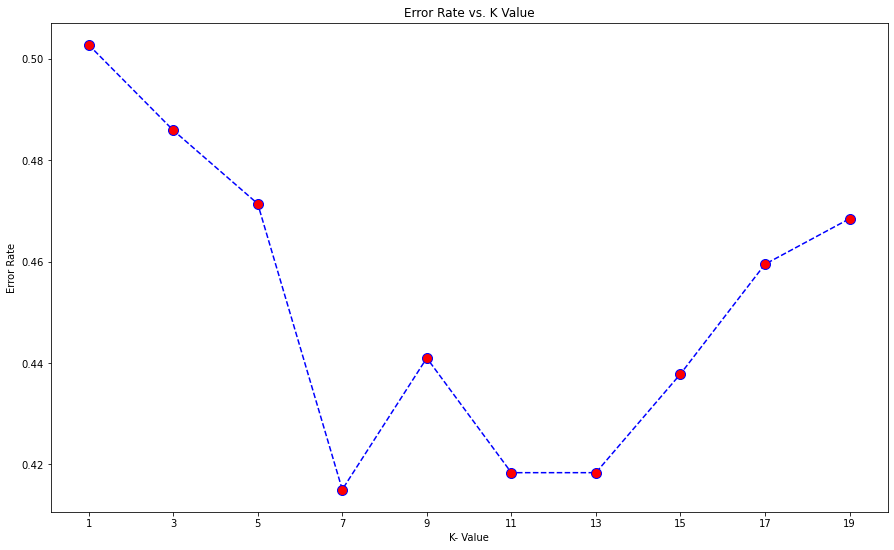

In [26]:
#Plotting the error rate So,that we can choose the value of K using Elbow Method

plt.figure(figsize=(15,9))
plt.plot(range(1,20,2),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K- Value')
plt.xticks(range(1,20,2))
plt.ylabel('Error Rate')
None

In [27]:
# Using the Grid Search CV Method

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,3,5,7,9,11,13,15,17]}

model = KNeighborsClassifier()

model = GridSearchCV(model, params, cv=10)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 5}

In [28]:
#load the model
model=KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

In [29]:
# fitting the model
model.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1)

In [30]:
# preding the model with train data
knn_pred_train=model.predict(X_train)

In [31]:
# preding the model with test data
knn_pred=model.predict(X_test)

In [32]:
# confusion matrix of the test data

print(confusion_matrix(y_test,knn_pred))

[[ 36  24   3]
 [ 15 245   4]
 [  3  13  17]]


In [33]:
# classification report of test data 

pd.DataFrame(classification_report(y_test,knn_pred,output_dict=True))

,2,3,4,accuracy,macro avg,weighted avg
precision,0.666667,0.868794,0.708333,0.827778,0.747931,0.818713
recall,0.571429,0.928030,0.515152,0.827778,0.671537,0.827778
f1-score,0.615385,0.897436,0.596491,0.827778,0.703104,0.820490
support,63.000000,264.000000,33.000000,0.827778,360.000000,360.000000


In [34]:
# The accuracy of the model with train data
accuracy_score(knn_pred_train,y_train)

0.9

In [35]:
# The accuracy of the model with test data
accuracy_score(knn_pred,y_test)

0.8277777777777777

##### ✔️   With test data, we achieved an accuracy of 82%, and with training data, we achieved an accuracy of 90% in RandomForestClassifier

# 4. Decision Tree with GridSearchCV

In [36]:
# Training the model
from sklearn.tree import DecisionTreeClassifier

classifier_dtg=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},
            {'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_griddtree=GridSearchCV(estimator=classifier_dtg, param_grid=parameters, scoring='accuracy',cv=10)
model_griddtree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [37]:
# load the model

dtc=tree.DecisionTreeClassifier(max_depth=4,min_samples_split=2,)

In [38]:
# fit the model

dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.5446428571428571, 0.9, 'X[3] <= 1.185\ngini = 0.434\nsamples = 840\nvalue = [131, 610, 99]'),
 Text(0.2857142857142857, 0.7, 'X[2] <= -0.182\ngini = 0.31\nsamples = 712\nvalue = [115, 580, 17]'),
 Text(0.14285714285714285, 0.5, 'X[7] <= -0.516\ngini = 0.51\nsamples = 287\nvalue = [113, 166, 8]'),
 Text(0.07142857142857142, 0.3, 'X[1] <= -1.783\ngini = 0.144\nsamples = 117\nvalue = [2, 108, 7]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.119\nsamples = 112\nvalue = [2, 105, 5]'),
 Text(0.21428571428571427, 0.3, 'X[0] <= -0.997\ngini = 0.457\nsamples = 170\nvalue = [111, 58, 1]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.368\nsamples = 51\nvalue = [11, 39, 1]'),
 Text(0.25, 0.1, 'gini = 0.268\nsamples = 119\nvalue = [100, 19, 0]'),
 Text(0.42857142857142855, 0.5, 'X[4] <= 1.083\ngini = 0.051\nsamples = 425\nvalue = [2, 414, 9]'),
 Text(0.35714285714285715, 0.3, 'X[4] <= -1.837\ngini = 0.01\nsamples =

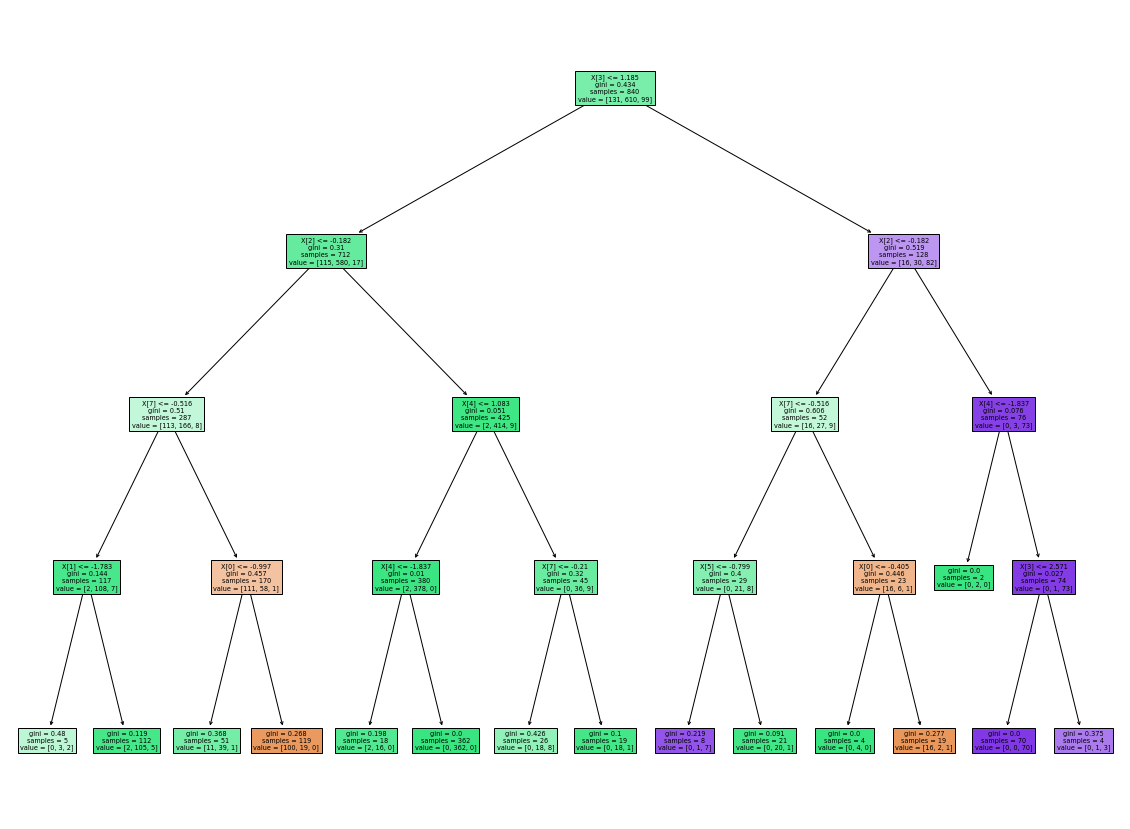

In [39]:
plt.figure(figsize=(20,15))
tree.plot_tree(dtc,filled=True)

In [40]:
model_griddtree.best_params_

{'criterion': 'entropy', 'min_samples_split': 5}

In [41]:
# Predicting the model with training data
y_predict_dtree_train = model_griddtree.predict(X_train)

In [42]:
# Predicting the model with test data
y_predict_dtree = model_griddtree.predict(X_test)

In [43]:
confusion_matrix(y_test,y_predict_dtree)

array([[ 52,  10,   1],
       [  7, 250,   7],
       [  2,   7,  24]], dtype=int64)

In [44]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_train,y_predict_dtree_train))
pd.DataFrame(classification_report(y_train,y_predict_dtree_train,output_dict=True))

0.9821428571428571


,2,3,4,accuracy,macro avg,weighted avg
precision,0.955882,0.986907,0.989247,0.982143,0.977345,0.982344
recall,0.992366,0.988525,0.929293,0.982143,0.970061,0.982143
f1-score,0.973783,0.987715,0.958333,0.982143,0.973277,0.982079
support,131.000000,610.000000,99.000000,0.982143,840.000000,840.000000


In [45]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
pd.DataFrame(classification_report(y_test,y_predict_dtree,output_dict=True))

0.9055555555555556


,2,3,4,accuracy,macro avg,weighted avg
precision,0.852459,0.93633,0.750000,0.905556,0.846263,0.904572
recall,0.825397,0.94697,0.727273,0.905556,0.833213,0.905556
f1-score,0.838710,0.94162,0.738462,0.905556,0.839597,0.904988
support,63.000000,264.00000,33.000000,0.905556,360.000000,360.000000


##### ✔️   With test data, we achieved an accuracy of 90%, and with training data, we achieved an accuracy of 98% in RandomForestClassifier

## 5. Random Forest with GridSearchCV

In [46]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

classifier_rfg=RandomForestClassifier(random_state=33)
parameters=[{'min_samples_split':[2,3,4,5],
             'criterion':['gini','entropy'],
             'min_samples_leaf':[1,2,3], 
             'max_depth': list(range(2,15))}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)
#   'n_estimators': list(range(100,501,100)),'max_features' : ['sqrt', 'log2']

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                        14],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [47]:
model_gridrf.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [48]:
# Predicting the model
rfc_pred_train = model_gridrf.predict(X_train)

In [49]:
# Predicting the model
y_predict_rf = model_gridrf.predict(X_test)

In [50]:
confusion_matrix(y_test,y_predict_rf)

array([[ 56,   7,   0],
       [  4, 255,   5],
       [  1,   7,  25]], dtype=int64)

In [51]:
# The classification report of the model with train data

pd.DataFrame(classification_report(y_test,y_predict_rf,output_dict=True))

,2,3,4,accuracy,macro avg,weighted avg
precision,0.918033,0.947955,0.833333,0.933333,0.899774,0.932212
recall,0.888889,0.965909,0.757576,0.933333,0.870791,0.933333
f1-score,0.903226,0.956848,0.793651,0.933333,0.884575,0.932504
support,63.000000,264.000000,33.000000,0.933333,360.000000,360.000000


In [52]:
# The accuracy score of the model with train data

accuracy_score(y_train,rfc_pred_train)

0.9619047619047619

In [53]:
# The accuracy score of the model with test data

accuracy_score(y_test,y_predict_rf)


0.9333333333333333

##### ✔️   With test data, we achieved an accuracy of 93%, and with training data, we achieved an accuracy of 96% in RandomForestClassifier

## 7. Artificial Neural Network

In [54]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(X_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [55]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [56]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.8916666666666667
              precision    recall  f1-score   support

           2       0.78      0.81      0.80        63
           3       0.93      0.94      0.93       264
           4       0.81      0.67      0.73        33

    accuracy                           0.89       360
   macro avg       0.84      0.81      0.82       360
weighted avg       0.89      0.89      0.89       360



##### ✔️   With test data, we achieved an accuracy of 89%, and with training data, we achieved an accuracy of 95% in RandomForestClassifier

# Model Compression

In [57]:
x=PrettyTable()

In [58]:
# Creating the table to compare the model accuracy

x.field_names = ["Model","(test)Accuracy", "(train)Accuracy"]
x.add_row(["Logistic Regression",'81 %','79%'])
x.add_row(["K-Nearest Neighbor", '82 %','90 %'])
x.add_row(["Support Vector Classifier",'84 %','98 %'])
x.add_row(["Decision Trees Classifier with GridsearchCV",'90 %','98 %'])
x.add_row(["Random Forest with GridsearchCV",' 93 %','96 %'])
x.add_row(["Artificial Neural Networkt", '89 %','95 %'])

## The accuracy of the every model

In [59]:
print(x)

+---------------------------------------------+----------------+-----------------+
|                    Model                    | (test)Accuracy | (train)Accuracy |
+---------------------------------------------+----------------+-----------------+
|             Logistic Regression             |      81 %      |       79%       |
|              K-Nearest Neighbor             |      82 %      |       90 %      |
|          Support Vector Classifier          |      84 %      |       98 %      |
| Decision Trees Classifier with GridsearchCV |      90 %      |       98 %      |
|       Random Forest with GridsearchCV       |      93 %      |       96 %      |
|          Artificial Neural Networkt         |      89 %      |       95 %      |
+---------------------------------------------+----------------+-----------------+


####  Based on the observations above, we can conclude thatRandom Forest with GridsearchCV is the best-fitting model with the  test data, we achieved an accuracy of 93%, and with training data, we achieved an accuracy of 96% accuracy for the given problem

# Conclusion

The overall employee performance can be achieved by employee environment satisfaction. The company needs to focus more on the employee environment.The salary hike will give the boost to the employees to perform well financially and psychologically.The promotion will help the employees to achieve more performance by giving the chance to be more responsible and leadership qualities.